In [470]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

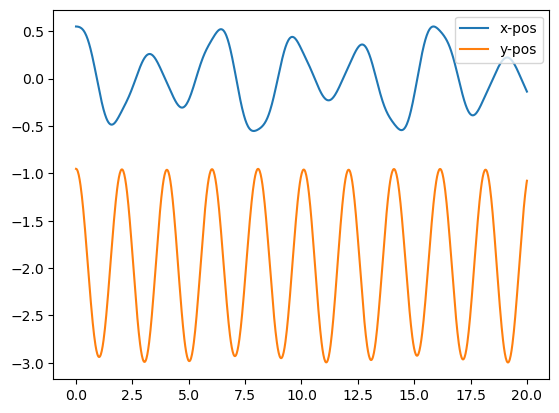

In [676]:
g=9.81 # m/s^2
k=1 #N/m
l0= 1 # m
m= 0.1 # kg
def dsdt(t,s):
    x, theta, v, omega = s
    return [v,
            omega, 
            (l0 + x)*omega**2 - (k/m)* x + (g* np.cos(theta)),
            -(g*np.sin(theta))/(l0 + x) - (2* v*omega)/(l0 + x)
           ]
x0=0.1
v0=0
theta0 =np.pi/6
omega0 = 0
s0= (x0, theta0, v0, omega0)

t = np.linspace(0, 20, 1000)
sol = odeint(dsdt, y0=s0, t=t, tfirst=True)
x_ans =sol.T[0]+ l0
theta_ans = sol.T[1]

x_pos =x_ans * np.sin(theta_ans)

y_pos =-x_ans * np.cos(theta_ans)

plt.plot(t,x_pos, label='x-pos')
plt.plot(t,y_pos, label='y-pos')
plt.legend()

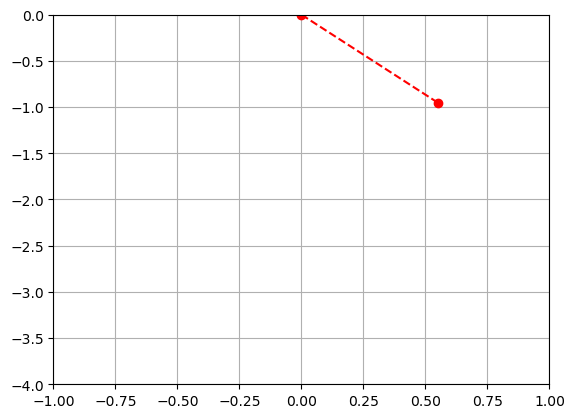

In [678]:
def animate(i):
    ln.set_data([0,x_pos[i]], [0, y_pos[i]])
    
fig, ax = plt.subplots(1,1)
ax.grid()
ln, = plt.plot([], [], 'ro--')

ax.set_ylim(-4, 0)
ax.set_xlim(-1,1)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=25)
ani.save('pen.gif',writer='pillow',fps=25)